# <center>----- Network Algorithms -----</center>

# Graph and DiGraph classes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

INF = 99999

class Graph:
    
    def __init__(self, edges):
        self.edges = {}
        self.nodes = {}
        for e in edges:
            self.add_edge(e)
    
    def add_node(self, n):
        if n not in self.nodes:
            self.nodes[n]=n
            
    def add_edge(self, e):
        w = 1 if len(e) == 2 else e[2]
        if (e[0],e[1],w) not in self.edges and (e[1],e[0],w) not in self.edges:
            self.add_node(e[0])
            self.add_node(e[1])
            self.edges[(e[0],e[1],w)] = (e[0],e[1],w)
            
    def get_nodes(self):
        return self.nodes.copy()
    
    def get_edges(self):
        return self.edges.copy()
            
    def get_neighbours(self, node):
        neighbours = []
        for edge in self.edges:
            if node == edge[0] and edge[1] not in neighbours:
                neighbours.append(edge[1])
            elif node == edge[1] and edge[0] not in neighbours:
                neighbours.append(edge[0])
        return neighbours
            
    def get_W_matrix(self):
        W = np.zeros((len(self.nodes), len(self.nodes)), dtype=int)
        for e in self.edges:
            W[e[0],e[1]] = e[2]
            W[e[1],e[0]] = e[2]
        return W                
    
class DiGraph:
    
    def __init__(self, edges):
        self.edges = {}
        self.nodes = {}
        for e in edges:
            self.add_edge(e)
    
    def add_node(self, n):
        if n not in self.nodes:
            self.nodes[n] = n
            
    def add_edge(self, e):
        w = 1 if len(e) == 2 else e[2]
        if (e[0],e[1],w) not in self.edges:
            self.add_node(e[0])
            self.add_node(e[1])
            self.edges[(e[0],e[1],w)] = (e[0],e[1],w)
            
    def get_nodes(self):
        return self.nodes.copy()
    
    def get_edges(self):
        return self.edges.copy()
            
    def get_neighbours(self, node):
        neighbours = []
        for edge in self.edges:
            if node == edge[0] and edge[1] not in neighbours:
                neighbours.append(edge[1])
        return neighbours
            
    def get_W_matrix(self):
        W = {}
        for e in self.edges:
            W[e[0],e[1]] = e[2]
        return W

# Cable Networks:

## 1. The routing problem: the minimum cost path problem

- <b>Not adaptative routing:</b> no weighted edges, routing tables are used.
- <b>Adaptative routing:</b> weighted edges (proportional to the traffic), each router creates its own routing table.
- <b>Routing with faults:</b> weighted edges (w(e) = -log(p(e)), p(e) is the probability that the edge e does not fail).
- <b>Why does routing matters?</b> End-to-end performance, use of network resources and transision.

### 1.1. Breadth First Search (BFS)

In [2]:
def get_neighbours(v,E):
    N = []
    for e in E:
        if e[0] == v: N.append(e[1])
    return N

def bfs(E, init):
    q = [init]
    l = []
    while(len(q)):
        l.append(q[0])
        for n in get_neighbours(q[0],E):
            if n not in l and n not in q:
                q.append(n)
        q.remove(q[0])
    return l

# Example:
E = [(0,1), (0,2), (1,3), (1,4), (2,3), (2,6), (3,4), (3,6), (4,5), (5,6), (6,0)]
print(bfs(E, 0))

[0, 1, 2, 3, 4, 6, 5]


### 1.2 The relaxation step

In [3]:
def relax(u, v, W, D, P):
    if D[u] + W[u,v] < D[v]:
        D[v] = D[u] + W[u,v]
        P[v] = u

### 1.3 Bellman-Ford algorithm

- One-to-all
- Negative edge weights are allowed.
- Complexity: O(nm).
    - n: number of nodes
    - m: number of edges

In [4]:
def bellman_ford(G, init):
    D = dict(zip(list(G.get_nodes()),[INF]*len(G.get_nodes())))
    D[init] = 0
    P = dict(zip(list(G.get_nodes()),[-1]*len(G.get_nodes())))
    W = G.get_W_matrix()
    for i in range(1,len(G.get_nodes())-1):
        for edge in G.get_edges():
            relax(edge[0], edge[1], W, D, P)
    return D, P

# Example:
G = DiGraph([(0,1,6), (0,2,7), (1,2,8), (1,3,5), (1,4,-4), (2,3,-3), (2,4,1), (3,1,-2), (4,0,2), (4,3,7)])
D, P = bellman_ford(G,0)
print('D =', D, '\nP =', P)

D = {0: 0, 1: 2, 2: 7, 3: 4, 4: -2} 
P = {0: -1, 1: 3, 2: 0, 3: 2, 4: 1}


### 1.4 Dijkstra algorithm

- One-to-all
- Negative edge weights are NOT allowed.
- Complexity: O(n²) using queue or O(m log n) using heap.
    - n: number of nodes
    - m: number of edges

In [5]:
def dijkstra(G, init):
    D = dict(zip(list(G.get_nodes()),[INF]*len(G.get_nodes())))
    D[init] = 0
    P = dict(zip(list(G.get_nodes()),[-1]*len(G.get_nodes())))
    S = []
    Q = list(G.get_nodes())
    Q.sort(key = lambda x: D[x])
    W = G.get_W_matrix()
    while(len(Q) != 0): 
        u = Q[0]
        Q.remove(u)
        S.append(u)
        for v in G.get_neighbours(u):
            relax(u,v,W,D,P)
            Q.sort(key = lambda x: D[x])
    return D, P

# Example:
G = DiGraph([(0,1,6), (0,2,7), (1,2,8), (1,3,9), (1,4,1), (2,3,8), (2,4,1), (3,1,2), (4,0,2), (4,3,7)])
D, P = dijkstra(G,0)
print('D =', D,'\nP =', P)

D = {0: 0, 1: 6, 2: 7, 3: 14, 4: 7} 
P = {0: -1, 1: 0, 2: 0, 3: 4, 4: 1}


### 1.5 Floyd-Warshall algorithm

- All-to-all
- Negative edge weights are allowed.
- Complexity: O(n³)
    - n: number of nodes

In [6]:
def floyd_warshall(G):
    dist = {}
    for u in G.get_nodes():
        for v in G.get_nodes():
            if u == v:
                dist[u,v] = 0
            else:
                dist[u,v] = INF
    for u, v, w in G.get_edges():
        dist[u, v] = w
    for k in G.get_nodes():
        for i in G.get_nodes():
            for j in G.get_nodes():
                dist[i,j] = min(dist[i,j], dist[i,k]+dist[k,j])
    return dist

# Example:
G = DiGraph([(0,1,6), (0,2,7), (1,2,8), (1,3,9), (1,4,1), (2,3,8), (2,4,1), (3,1,2), (4,0,2), (4,3,7)])
dist = floyd_warshall(G)
print(dist)

{(0, 0): 0, (0, 1): 6, (0, 2): 7, (0, 3): 14, (0, 4): 7, (1, 0): 3, (1, 1): 0, (1, 2): 8, (1, 3): 8, (1, 4): 1, (2, 0): 3, (2, 1): 9, (2, 2): 0, (2, 3): 8, (2, 4): 1, (3, 0): 5, (3, 1): 2, (3, 2): 10, (3, 3): 0, (3, 4): 3, (4, 0): 2, (4, 1): 8, (4, 2): 9, (4, 3): 7, (4, 4): 0}


### 1.6 Another application: tasks with precedence constraints

In [7]:
def construct_graph(tasks):
    G = DiGraph([])
    for k,v in tasks.items():
        G.add_edge(('t0',k,v['b']))
        for c in v['c']:
            G.add_edge((c,k,v['b']))
    return G

def multiply_weights_by_minus_one(edges):
    for i in range(len(edges)):
        edges[i] = (edges[i][0], edges[i][1], -edges[i][2])
    return edges
        
def update_tasks_with_starting_time(tasks,D,P):
    for k,v in tasks.items():
        v['s'] = -D[P[k]]
    
tasks = {
    't1': {'b': 2, 'c': ['t3']},
    't2': {'b': 3, 'c': ['t3']},
    't3': {'b': 1, 'c': []},
    't4': {'b': 2, 'c': []}
}

G = construct_graph(tasks)

for k,v in tasks.items():
    print(k, ':', v)

print('\nG = ', G.get_edges(), '\n')

newG = DiGraph(multiply_weights_by_minus_one(list(G.get_edges())))

print('newG = ', newG.get_edges(), '\n')

D, P = bellman_ford(newG,'t0')

print('D =', D, '\nP =', P)

update_tasks_with_starting_time(tasks,D,P)

print('')
for k,v in tasks.items():
    print(k, ':', v)

t1 : {'b': 2, 'c': ['t3']}
t2 : {'b': 3, 'c': ['t3']}
t3 : {'b': 1, 'c': []}
t4 : {'b': 2, 'c': []}

G =  {('t0', 't1', 2): ('t0', 't1', 2), ('t3', 't1', 2): ('t3', 't1', 2), ('t0', 't2', 3): ('t0', 't2', 3), ('t3', 't2', 3): ('t3', 't2', 3), ('t0', 't3', 1): ('t0', 't3', 1), ('t0', 't4', 2): ('t0', 't4', 2)} 

newG =  {('t0', 't1', -2): ('t0', 't1', -2), ('t3', 't1', -2): ('t3', 't1', -2), ('t0', 't2', -3): ('t0', 't2', -3), ('t3', 't2', -3): ('t3', 't2', -3), ('t0', 't3', -1): ('t0', 't3', -1), ('t0', 't4', -2): ('t0', 't4', -2)} 

D = {'t0': 0, 't1': -3, 't3': -1, 't2': -4, 't4': -2} 
P = {'t0': -1, 't1': 't3', 't3': 't0', 't2': 't3', 't4': 't0'}

t1 : {'b': 2, 'c': ['t3'], 's': 1}
t2 : {'b': 3, 'c': ['t3'], 's': 1}
t3 : {'b': 1, 'c': [], 's': 0}
t4 : {'b': 2, 'c': [], 's': 0}


### 1.7. Butterfly Network

- <b>Theorem:</b> Given any routing problem on an $n$-dimensional butterfly for which at most one packet starts at each layer $0$ node and at most one packet is destined for each layer $n$ node, the greedy algorithm will route all the packets to their destinations in $O\left(\sqrt{N}\right)$ steps.

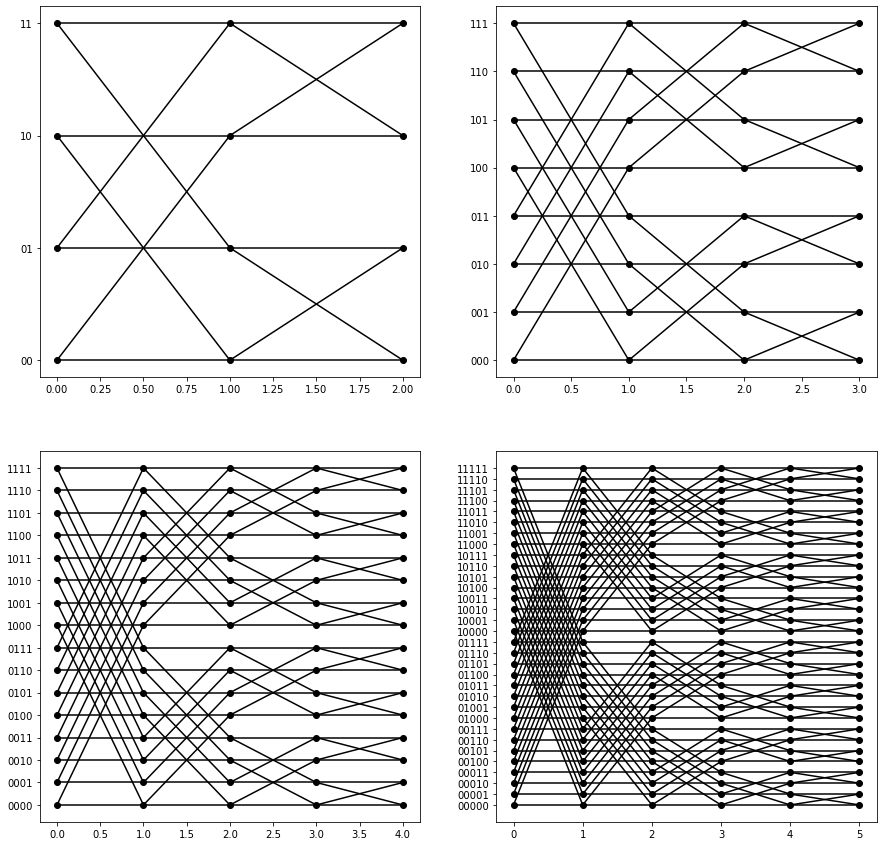

In [8]:
def butterfly_network(n):
    nodes= []
    edges = []
    for j in range(n+1):
        for i in range(2**n):
            i = bin(i)[2:].rjust(n, '0')
            nodes.append((i,j))
    for i in nodes:
        for j in nodes:
            if j[1] == i[1] + 1:
                if i[0] == j[0]:
                    edges.append((i,j))
                elif i[0][i[1]] != j[0][i[1]] and i[0][:i[1]] == j[0][:i[1]] and i[0][i[1]+1:] == j[0][i[1]+1:]:
                    edges.append((i,j))
    return DiGraph(edges)

def draw_b_network(G,n):
    edges = list(G.get_edges())
    nodes = list(G.get_nodes())
    lines = []
    for edge in edges:
        y1 = int(edge[0][0],2)
        y2 = int(edge[1][0],2)
        x1 = edge[0][1]
        x2 = edge[1][1]
        plt.plot([x1,x2],[y1,y2],c='black')
    for node in nodes:
        y = int(node[0],2)
        x = node[1]
        plt.plot([x],[y],'o',c='black')
    labels = [bin(x)[2:].rjust(n, '0') for x in range(0,2**n)]
    plt.yticks(range(0,2**n), labels)

plt.figure(figsize=(15,15)) 
plt.tight_layout()
plt.subplot(2,2,1)
G = butterfly_network(2)
draw_b_network(G,2)
G = butterfly_network(3)
plt.subplot(2,2,2)
draw_b_network(G,3)
G = butterfly_network(4)
plt.subplot(2,2,3)
draw_b_network(G,4)
G = butterfly_network(5)
plt.subplot(2,2,4)
draw_b_network(G,5)
plt.show()

### 1.8. Benes Network

- <b>Theorem:</b> Given any one-to-one mapping of $\pi$ of $2n$ inputs to $2n$ outputs in an $n$-dim. Beneš network, there is a set of node-disjoint paths from the inputs to the outputs connecting input $i$ to output $\pi(i)$ for $1\leq i \leq 2n$.

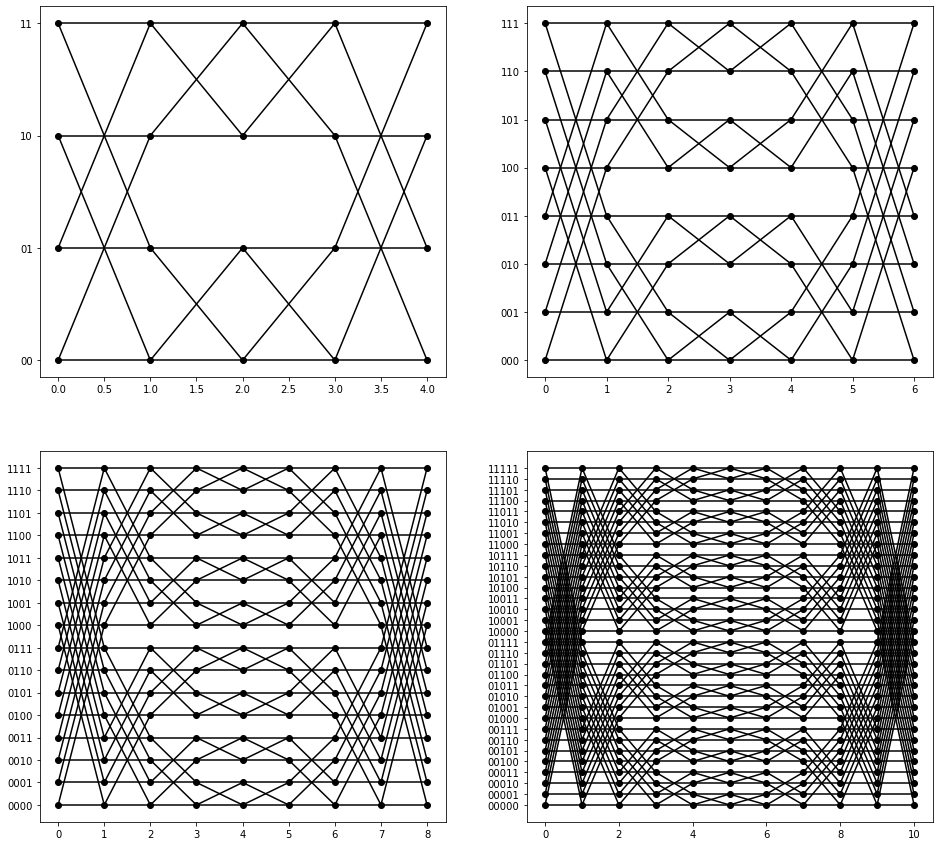

In [9]:
def benes_network(n):
    nodes= []
    edges = []
    for j in range(n+1):
        for i in range(2**n):
            i = bin(i)[2:].rjust(n, '0')
            nodes.append((i,j))
    for i in nodes:
        for j in nodes:
            if j[1] == i[1] + 1:
                i_ = (i[0],2*n-i[1])
                j_ = (j[0],2*n-j[1])
                if i[0] == j[0]:
                    edges.append((i,j))
                    edges.append((i_,j_))
                elif i[0][i[1]] != j[0][i[1]] and i[0][:i[1]] == j[0][:i[1]] and i[0][i[1]+1:] == j[0][i[1]+1:]:
                    edges.append((i,j))
                    edges.append((i_,j_))
    return DiGraph(edges)

plt.figure(figsize=(16,15)) 
plt.tight_layout()
plt.subplot(2,2,1)
G = benes_network(2)
draw_b_network(G,2)
G = benes_network(3)
plt.subplot(2,2,2)
draw_b_network(G,3)
G = benes_network(4)
plt.subplot(2,2,3)
draw_b_network(G,4)
G = benes_network(5)
plt.subplot(2,2,4)
draw_b_network(G,5)
plt.show()

## 2. The interconnection topology layout problem: the orthogonal grid drawing

### 2.1. Collinear Layout

- Height of a collinear layout: $\sum_{i=1}^{n-1}{\min(i,n-1)} = \frac{n^2}{4}$.
- Width of a collinear layout: $n^2$.
- Area of a collinear layout: $\frac{n^4}{4}$.
- Bisection width of a complete graph: $\frac{n^2}{4}+o\left(n^2\right)$.
- <b>Theorem:</b> A lower bound on the number of tracks in the collinear layout of a network is its bisection width: $\frac{n^2}{4}+o\left(n^2\right)$.

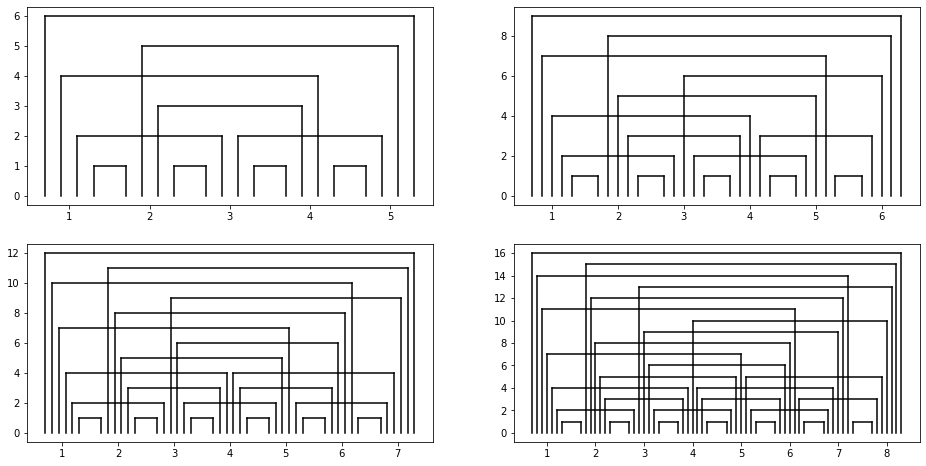

In [10]:
def draw_collinear_layout(n):
    h = 1
    s = [0]
    if n > 2:
        s = np.arange(0.3,-0.3-0.4/(n-2),-0.6/(n-2))
    for k in range(1,n):
        for j in range(n-k):
            i = (1+j)%n
            h_ = h + (i-1)%k
            s_ = s[k-1]
            if i+k <= n:
                plt.plot([i+s_,i+s_],[0,h_], c='black')
                plt.plot([i+k-s_,i+k-s_],[0,h_], c='black')
                plt.plot([i+s_,i+k-s_],[h_,h_], c='black')
        h += min(k,n-k)

plt.figure(figsize=(16,8)) 
plt.tight_layout()
plt.subplot(2,2,1)
draw_collinear_layout(5)
plt.subplot(2,2,2)
draw_collinear_layout(6)
plt.subplot(2,2,3)
draw_collinear_layout(7)
plt.subplot(2,2,4)
draw_collinear_layout(8)
plt.show()

### 2.2. Orthogonal Layout

- Area: $\frac{n^4}{16}$
- Bisection width of a complete graph: $\frac{n^2}{4} + o\left(n^4\right)$.
- <b>Theorem:</b> A lower bound on the layout area of a network is the square of its bisection width: $\frac{n^2}{4} + o\left(n^4\right)$.

In [11]:
# TODO: implement the orthogonal layout

### 2.3. Wise Layout

In [12]:
# TODO: implement the Wise Layout

# Not finished #############################################################
# def wise_layout(n):
#     h = [0]
#     i = 2**n
#     while(i > 0):
#         h.append(h[-1]+i)
#         i = int(i/2)
#     for j in range(len(h)):
#         for i in range(2**n): 
#             if j < len(h)-1:
#                 aux = int((2**(n-j)/2))
#                 if aux != 0: 
#                     if i%(aux*2) < aux:
#                         plt.plot([i,i+aux],[h[j],h[j+1]],c='silver')
#                     else:
#                         plt.plot([i,i-aux],[h[j],h[j+1]],c='black')
#             plt.plot([i],[h[j]],'o',c='black')
        

# plt.figure(figsize=(15,15)) 
# plt.tight_layout()
# plt.subplot(2,2,1)
# wise_layout(2)
# plt.subplot(2,2,2)
# wise_layout(3)
# plt.subplot(2,2,3)
# wise_layout(4)
# plt.subplot(2,2,4)
# wise_layout(5)
# plt.show()
############################################################################

### 2.4. Layered Cross Product (Even and Even Layout )

In [13]:
def layered_cross_product(g1,g2):
    g = []
    for e1 in g1:
        for e2 in g2:
            if e1[2]==e2[2]:
                g.append(((e1[0],e2[0]),(e1[1],e2[1]),e1[2]))
    return g

g1 = [('a','b',0),('b','c',1),('c','d',2),('c','e',2)]
g2 = [(1,2,0),(2,3,1),(2,4,1),(3,5,2),(4,6,2)]
g = layered_cross_product(g1,g2)
print(g)

[(('a', 1), ('b', 2), 0), (('b', 2), ('c', 3), 1), (('b', 2), ('c', 4), 1), (('c', 3), ('d', 5), 2), (('c', 4), ('d', 6), 2), (('c', 3), ('e', 5), 2), (('c', 4), ('e', 6), 2)]


### 2.5. Projection Methodology (Even and Even Layout )

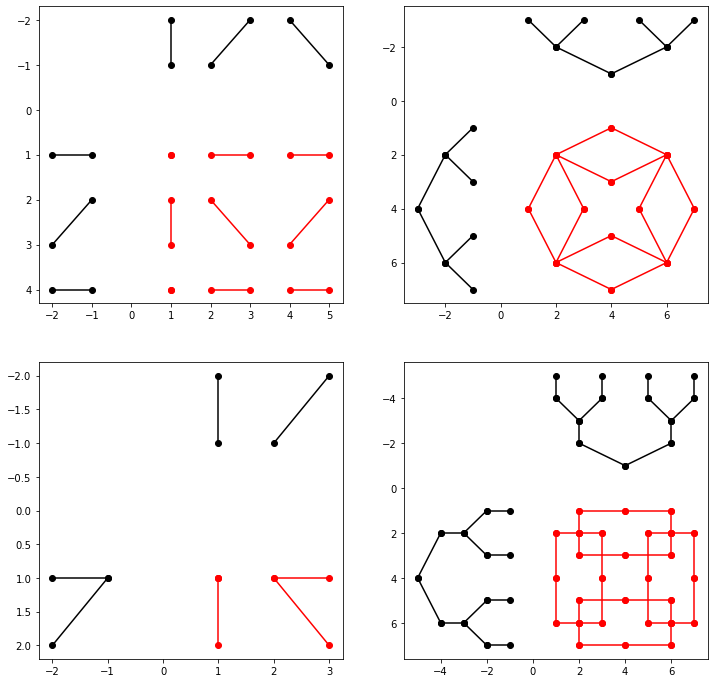

In [14]:
def projection_methodology(vh, vv):
    for ev,eh in zip(vv,vh):
        plt.plot([-ev[0][0],-ev[1][0]],[ev[0][1],ev[1][1]], c='black')
        plt.plot([eh[0][0],eh[1][0]],[-eh[0][1],-eh[1][1]], c='black')
        plt.plot([-ev[0][0],-ev[1][0]],[ev[0][1],ev[1][1]],'o', c='black')
        plt.plot([eh[0][0],eh[1][0]],[-eh[0][1],-eh[1][1]],'o', c='black')
    for ev in vv:
        for eh in vh:
            if eh[0][1] == ev[0][0]:
                if (eh[1][1] == ev[1][0]):
                    plt.plot([eh[0][0],eh[1][0]],[ev[0][1],ev[1][1]],c='red')
                    plt.plot([eh[0][0],eh[1][0]],[ev[0][1],ev[1][1]],'o',c='red')
            else:
                if (eh[0][1] == ev[1][0]) and (eh[1][1] == ev[0][0]):
                    plt.plot([eh[0][0],eh[1][0]],[ev[1][1],ev[0][1]],c='red')
                    plt.plot([eh[0][0],eh[1][0]],[ev[1][1],ev[0][1]],'o',c='red')
                
    plt.gca().invert_yaxis()

vh1 = [((1,1),(1,2)),((2,1),(3,2)),((4,2),(5,1))]
vv1 = [((1,1),(2,1)),((1,2),(2,3)),((2,4),(1,4))]
vh2 = [((1,3),(2,2)),((2,2),(3,3)),((2,2),(4,1)),((4,1),(6,2)),((5,3),(6,2)),((6,2),(7,3))]
vv2 = [((1,1),(2,2)),((2,2),(1,3)),((2,2),(3,4)),((3,4),(2,6)),((1,5),(2,6)),((2,6),(1,7))]
vh3 = [((1,1),(1,2)),((2,1),(3,2))]
vv3 = [((1,1),(2,1)),((1,1),(2,2))]
vh4 = [((1,5),(1,4)),((3,5),(3,4)),((5,5),(5,4)),((7,5),(7,4)),((1,4),(2,3)),((3,4),(2,3))
     ,((5,4),(6,3)),((7,4),(6,3)),((2,3),(2,2)),((6,3),(6,2)),((2,2),(4,1)),((6,2),(4,1))]
vv4 = [((1,1),(2,1)),((1,3),(2,3)),((1,5),(2,5)),((1,7),(2,7)),((2,1),(3,2)),((2,3),(3,2))
     ,((2,5),(3,6)),((2,7),(3,6)),((3,2),(4,2)),((3,6),(4,6)),((4,2),(5,4)),((4,6),(5,4))]

plt.figure(figsize=(12,12)) 
plt.tight_layout()
plt.subplot(2,2,1)
projection_methodology(vh1,vv1)
plt.subplot(2,2,2)
projection_methodology(vh2,vv2)
plt.subplot(2,2,3)
projection_methodology(vh3,vv3)
plt.subplot(2,2,4)
projection_methodology(vh4,vv4)
plt.show()

### 2.6. Hypercube $Q_n$

- $|V| = N = 2^n$
- $|E| = \frac{1}{2} 2^nn = \frac{1}{2} N \log_2{N}$
- Diameter $= n = \log_2{N}$
- Bisection width $= 2^{n-1} = \frac{2^n}{2} = \frac{N}{2}$
- Lowerbound on the layout area of a network is the square of its bisectin width. So, layout of $Q_n$ has area at least $\frac{N^2}{4}$.

### 2.7. Collinear Layout for Hypercube

- Number of tracks: $f(n) = \left\{\begin{matrix}
                     2f(n-1)+1 & \textrm{if } n \textrm{ is odd}\\ 
                     4f(n-2)+2)& \textrm{if } n \textrm{ is even}
                     \end{matrix}\right.$
- Area: $\frac{2}{3}2^n = \frac{2}{3} N$

In [15]:
# TODO

# Not finished #############################################################
# def collinear_layout_hypercube(n):
#     labels = [bin(x)[2:].rjust(n, '0') for x in range(0,2**n)]
#     plt.xticks(range(0,2**n), labels)
#     h = 1
#     s = [0]
#     if n > 1:
#         s = np.arange(0.4,-0.4-0.2/(2**n-2),-0.8/(2**n-2))
#     for k in range(1,2**n):
#         for j in range(2**n-k):
#             i = (1+j)%2**n
#             h_ = h + (i-1)%k
#             s_ = s[k-1]
#             if i+k <= 2**n:
#                 plt.plot([i+s_-1,i+s_-1],[0,h_], c='black')
#                 plt.plot([i+k-s_-1,i+k-s_-1],[0,h_], c='black')
#                 plt.plot([i+s_-1,i+k-s_-1],[h_,h_], c='black')
#         h += min(k,2**n-k)
        
# plt.figure(figsize=(16,4)) 
# plt.tight_layout()
# plt.subplot(1,2,1)
# collinear_layout_hypercube(2)
# plt.subplot(1,2,2)
# collinear_layout_hypercube(3)
# plt.show()
# plt.figure(figsize=(16,16)) 
# plt.subplot(1,1,1)
# collinear_layout_hypercube(4)
# plt.show()
############################################################################

## 3. The problem of infecting a network with a worm: the minimum vertex cover problem

### 3.1. Greedy1-VC algorithm

- Can happen that $V' = \log(V^*) \cdot V^*$ where $V^{*}$ is a true minimum vertex cover and $V'$ is the minimum vertex cover approximation produced by the algorithm.

In [16]:
def greedy1_vc(E):
    E_ = E.copy()
    V_ = []
    while(len(E_)):
        v = E_[0][0]
        V_.append(v)
        for e in E_.copy():
            if e[0] == v or e[1] == v:
                E_.remove(e)
    return V_

E = [(6,'a'),(6,'b'),(6,'d'),(6,'d'),(5,'a'),(5,'b'),(5,'c'),(5,'d'),(4,'d'),(3,'c'),(2,'b'),(1,'a')]
print(greedy1_vc(E))
E.reverse()
print(greedy1_vc(E))

[6, 5, 4, 3, 2, 1]
[1, 2, 3, 4, 5, 6]


### 3.2. Greedy2-VC algorithm

- Also can happen that $V' = \log(V^*) \cdot V^*$ where $V^{*}$ is a true minimum vertex cover and $V'$ is the minimum vertex cover approximation produced by the algorithm.

In [17]:
def get_neighbours(v,E):
    N = []
    for e in E:
        if e[0] == v: N.append(e[1])
        elif e[1] == v: N.append(e[0])
    return N

def greedy2_vc(E):
    E_ = E.copy()
    V_ = []
    while(len(E_)):
        n0 = get_neighbours(E_[0][0], E_)
        n1 = get_neighbours(E_[0][1], E_)
        v = E_[0][0]
        if len(n1) > len(n0): v = E_[0][1]
        V_.append(v)
        for e in E_.copy():
            if e[0] == v or e[1] == v:
                E_.remove(e)
    return V_

E = [(6,'a'),(6,'b'),(6,'d'),(6,'d'),(5,'a'),(5,'b'),(5,'c'),(5,'d'),(4,'d'),(3,'c'),(2,'b'),(1,'a')]
print(greedy2_vc(E))
E.reverse()
print(greedy2_vc(E))

[6, 5, 4, 3, 2, 1]
['a', 'b', 'c', 'd']


### 3.3. 2-Approx1-VC algorithm

- $|V'| \leq 2|V^{*}|$, where $V^{*}$ is a true minimum vertex cover and $V'$ is the minimum vertex cover approximation produced by the algorithm.
- Complexity: $O(m+n)$

In [18]:
def twoapprox1_vc(E):
    E_ = E.copy()
    V_ = []
    while(len(E_)):
        v = E_[0][0]
        u = E_[0][1]
        V_.append(v)
        V_.append(u)
        for e in E_.copy():
            if e[0] == v or e[1] == v or e[0] == u or e[1] == u:
                E_.remove(e)
    return V_

E = [(6,'a'),(6,'b'),(6,'d'),(6,'d'),(5,'a'),(5,'b'),(5,'c'),(5,'d'),(4,'d'),(3,'c'),(2,'b'),(1,'a')]
print(twoapprox1_vc(E))
E.reverse()
print(twoapprox1_vc(E))

[6, 'a', 5, 'b', 4, 'd', 3, 'c']
[1, 'a', 2, 'b', 3, 'c', 4, 'd']


### 3.4. 2-Approx2-VC algorithm

- $|V'| \leq 2|V^{*}|$, where $V^{*}$ is a true minimum vertex cover and $V'$ is the minimum vertex cover approximation produced by the algorithm.
- Complexity: $O(m+n)$

In [30]:
# TODO

# Not finished #############################################################
# def LP(E):
#     V = []
#     for e in E:
#         if e[0] not in V: V.append(e[0])
#         if e[1] not in V: V.append(e[1])
#     A = np.zeros((len(V)+len(E),len(E)))
#     B = np.ones(len(E))
#     for i in range(len(E)):
#         A[len(V)+i,i] = -1
#     print(A,B)
    
# E = [('a','b'),('a','c'),('a','d'),('b','d'),('c','d')]
# LP(E)
############################################################################

### 3.5. New-Approx-VC

- $|V'| \leq 2|V^{*}|$, where $V^{*}$ is a true minimum vertex cover and $V'$ is the minimum vertex cover approximation produced by the algorithm. Since $|M| \leq |C|$ with $M$ a matching for the graph and $C$ a vertex cover for the graph.
- Complexity: $O(n^2)$ or $O(m\sqrt{n})$ depending on the computation of the max covering.

In [ ]:
# TODO

### 3.6. Bipartite Graph VC

- $|V'| = |M|$ for $V'$ a minimum vertex cover of $G$ and $M$ a maximum matching for $G$ and $G$ a bipartite graph.  

In [ ]:
# TODO

## 4. The problem of minimizing a boolean circuit: the minimum set covering problem

## 6. The minimum energy broadcast problem: the minimum spanning tree problem

### 6.1. Finding safe arc and check if it is a spanning tree

In [28]:
def is_safe(T,e):
    if e[0] in T.nodes and e[1] in T.nodes:
        if e[1] in bfs(T.get_edges(),e[0]):
            return False
    return True

def is_a_spanning_tree(G,T):
    if not len(list(T.get_edges())): return False
    return len(bfs(T.get_edges(),list(T.get_nodes()))[0]) == len(G.get_nodes())

def find_safe_arc(E,T):
    e = E[0]
    E.remove(e)
    if is_safe(T, e):
        return e
    else:
        return find_safe_arc(E,T)

### 6.2. Kruskal algorithm

In [29]:
def kruskal(G):
    T = Graph([])
    E = list(G.get_edges())
    E.sort(key = lambda val: val[2])
    while(not is_a_spanning_tree(G,T)):
        e = find_safe_arc(E,T)
        T.add_edge(e)
    return T

# Example:
G = Graph([(0,1,4),(0,2,11),(1,2,11),(1,3,8),(2,4,1),(2,8,7),(3,5,7),
           (3,6,4),(3,8,2),(4,6,2),(4,8,6),(5,6,14),(5,7,9),(6,7,10)])
T = kruskal(G)
print(list(T.edges))

[(2, 4, 1), (3, 8, 2), (4, 6, 2), (0, 1, 4), (3, 6, 4), (3, 5, 7), (1, 3, 8), (5, 7, 9)]


### 6.3. Prim algorithm

In [ ]:
def prim(G):
    pass

# Example:
G = Graph([(0,1,4),(0,2,11),(1,2,11),(1,3,8),(2,4,1),(2,8,7),(3,5,7),
           (3,6,4),(3,8,2),(4,6,2),(4,8,6),(5,6,14),(5,7,9),(6,7,10)])
T = prim(G)
#print(T.edges)

### 6.4 Boruvka algorithm

In [ ]:
def boruvka(G):
    pass

# Example:
G = Graph([(0,1,4),(0,2,11),(1,2,11),(1,3,8),(2,4,1),(2,8,7),(3,5,7),
           (3,6,4),(3,8,2),(4,6,2),(4,8,6),(5,6,14),(5,7,9),(6,7,10)])
T = boruvka(G)
#print(T.edges)